# COGS 118A - Final Project

# Determining the Fair-market Price of Used Cars using Machine Learning Models

## Group members

- Adi Krishnamoorthy
- Akshat Mittal
- Anthony Truong
- Brandon Kao

# Abstract 
--------------------------------------------------------

The goal of this project is to develop and algorithm that can determine the fair market value of used cars based on a variety of factors. The dataset we intend on using contains multiple specifications of a car being sold such as the make, model, year etc. In our project, we ran a variety of regression models (DecisionTreeRegressor, LinearSVR, KNeighborsRegressor, RandomForestRegressor, AdaBoost Regressor, GradientBoostingRegressor, BaggingRegressor, MLPRegressor, SGDRegressor) on our cleaned dataset and measured success based on the values of evaluation metrics, like the mean squared error and $R^2$ score. Our results showed that the RandomForest and Bagging Regressors had the greatest mean $R^2$ scores - RandomForestRegressor had an $R^2$ of 0.9286 and BaggingRegressor had an $R^2$ of 0.9310. We therefore concluded that these two were the best regressors at measuring the market price of used cars.

# Background

------------------------------------------------------------------------

According to Mordor Intelligence, the US used cars market was evaluated at USD 195.84 billion in 2021 and is expected to balloon to USD 302.47 billion by 2027 (MordorIntelligence). In comparison, the used apparel market in the US is expected to grow to USD 82 billion by 2026 (Clark). A market this big begs to be studied and an algorithm that can provide customers with an estimate of the value of the car they are looking to buy or sell will help them make the right financial decisions. Prior research in this field has analyzed the used car markets in various foreign countries such as the UAE (AlShared) and Turkey (Bilen). Work done by Bilen on the Turkey market was able to achieve the lowest estimation error of MAE 0.01050 and MSE 0.000281 using the Fisher+ANN model. However, the only variables they looked into were horsepower, engine, brand, gear, and the model year. In contrast, the UAE study deals with less technical and more superficial factors such as the mileage and the color of the vehicle. Using the PSO-GRA-BPNN model, the study was able to achieve an MAE of 0.475. 

# Problem Statement
------------------------------------------------------------

The problem that we are solving is the unknown and ambiguous pricing of used cars in the U.S for both buyers and sellers. The buyer does not want to pay more than what the car is worth, but can not limit their budget so much that they are unable to purchase an acceptable car at all. For the seller, they usually want to sell the car as soon as possible, but avoid decreasing the price to the point where they’re losing money. The ability to accurately predict used car prices has significant implications for both the automobile industry as well as for individual buyers and sellers. To quantify and measure the problem, we can look at the variance between cars with very similar features and how much their prices and how much time the car is listed to sell and if that is consistent with our prediction or potentially survey people if they are satisfied with the amount of money they paid/received for their car (iSeeCars). But ultimately, we want to accurately predict what a used car’s listing price will be given some features such as mileage or age. As the used car market does not seem to be slowing down anytime soon (ACV Auctions), the problem will be replicable.

# Data
-----------------------------------------------------------------------------

We are using three different datasets found here:

- df0 which can be found at: https://www.kaggle.com/datasets/ananaymital/us-used-cars-dataset

- df1 which can be found at: https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data

- df2 which can be found at: https://www.kaggle.com/datasets/3ea0a6a45dbd4713a8759988845f1a58038036d84515ded58f65a2ff2bd32e00?select=us-dealers-used.csv (Only the US section since different countries have different markets, regulations, etc surrounding this industry)

- With millions of observations per dataset, we have taken a sample of each dataset for our use. In our samples, df0 has 100,000 observations and 66 features, df1 has 100,000 observations and 27 features, and df2 has 100,000 observations and 22 features.

- We have combined these datasets into 1 single huge dataset and cleaned it for our purposes

- To combine these 3 different datasets, we needed to select features common across all datasets otherwise we would have a lot of null values. The features we chose are:
  - VIN 
  - Year
  - Make
  - Model 
  - City
  - Mileage
  - Fuel
  - Transmission 
  - Engine
  - Drive
  - Latitude
  - Longitude 
  - Body Type
  - Country of Manufacture 
  - Luxury 

- However, in order to get a coherent dataset, we needed to do a lot of cleaning.
  - Features besides the Latitude, Longitude, Country of Manufacture, and Luxury were common across all datasets. 
  - Latitude and Longitude were present in df0 and df1. Using the pgeocode package found at https://pypi.org/project/pgeocode/, we can find the coordinates with the help of the zip code feature present in df2.
  - VIN(Vehicle Identification Number) is a unqiue number attached to each vehicle for identification purposes. Thus, the number itself is not a useful feature but useful information can be derived from it. 
    - Using the VIN decoder found at https://pypi.org/project/vininfo/, we can find the country of manufacture for the vehicle
  - The luxury section confirms whether a given vehicle is considered luxury or not. This is considered somewhat subjective so we used the make of the car to determine if its luxury or not based on the list provided here: https://luxe.digital/business/digital-luxury-ranking/best-luxury-car-brands/

- Next, values that meant the same thing but were not coded as such were fixed. For example, A and Automatic meant the same thing in the transmission section and both were corrected to "automatic."

- Observations with null values were dropped as well. 

- Lastly, we one hot encoded the categorical variables so that we can use them in the model. 

- The notebook that handled the cleaning can be found here: https://github.com/COGS118A/Group002-Wi23/blob/main/dataprocessing.ipynb

- Some critical values are the make, year, and the miles travled of the vehicle.Certain makes like Ferrari and Lamborghini and the year of the vehicle were highly correlated to higher prices while miles travelled were highly correlated to lower prices which makes intuitive sense.


# Proposed Solution
--------------------------------------------------------------------

A possible solution to the problem of predicting the prices of used cars is to build a machine learning model with polynomial regression that can learn the relationship between the car features and its price from historical data.


The goal of this solution is to create a model that can accurately predict the price of a used car based on its characteristics such as the make, model, year, mileage, condition, location, and other relevant features. To effectively model the intricate connections between each feature, a classification or regression tree(CART) can be used, although it runs the risk of overfitting and high variance. 

In order to optimize the quality of the model, we will conduct pre-processing on the data by eliminating less useful features and prune less useful branches. First, we need to prepare the data for the analysis by separating the features from the prediction variable, which is the price listed, and then dividing the data into training and testing sets using train_test_split. 

Next, we can clean the data by getting rid of features that won't be useful for the analysis and make sure the rest are comparable with one another. After that, we can use a set of of regression modules from sklearn (namely DecisionTreeRegressor, LinearSVR, KNeighborsRegressor, RandomForestRegressor, AdaBoost Regressor, GradientBoostingRegressor, BaggingRegressor, MLPRegressor, and SGDRegressor) to create and fit trees and models with different hyperparameters such as max_depth and use grid search to choose the best one. 

Finally, we can evaluate the model's accuracy using evaluation metrics such as mean squared error, mean absolute error, and $R^2$ score. We can compare our resultant model to pre-existing models that also predict prices of used cars but do so with different methods. These include the SOTA series of AI Blue Book models created by Yang et al., which used 6 different models from ranging from CNN to HOG.

# Evaluation Metrics
----------------------------------------------------------------------------

$R^2$ Score, Mean Squared Error, Mean Absolute Error

As we will be predicting the price of car listings, we can measure the performance of our model by using the coefficient of determination (or the $R^2$ score), the Mean Squared Error (MSE), and the Mean Absolute Error (MAE). The  $R^2$ score is a metric we can to measure the overall performance of our regression model and can be representated by the following:

$$
R^2 = 1 - \frac{\sum_i\left(Y_i-\hat{Y}_i\right)^2}{\sum_i\left(Y_i-\bar{Y}\right)^2}
$$

where $\bar{Y}$ is the mean. In Sklearn, the value of $R^2$ can range from $-\infty$ to 1, where 1 represents a perfect model and where 0 or below represents a model that is worse than guessing.


The MSE is the mean of the squared error and can be expressed mathematically as

$$
\text{MSE} = \frac{1}{n}\sum_{i=1}^n\left(Y_i-\hat{Y}_i\right)^2
$$

MAE is the mean of the absolute error and can be expressed mathematically as

$$
\text{MAE} = \frac{1}{n}\sum_{i=1}^n\left|Y_i-\hat{Y}_i\right|
$$

where $Y_i$ are the observed prices and $Y_i$ hat are the predicted prices.

# Results


### Data Preprocessing 

First we import the cleaned data from `raw_df.csv`.

In [ ]:
df = pd.read_csv("raw_df.csv")
df.head()

,vin,year,make,model,city,mileage,fuel,transmission,engine,drive,price,lat,long,body_type,country,luxury
0,ZACNJABB5KPJ92081,2019.0,jeep,renegade,bayamon,7.0,gasoline,automatic,2.0,fwd,23141.0,18.3988,-66.1582,suv,Italy,0
1,SALCJ2FX1LH858117,2020.0,landrover,discoverysport,sanjuan,8.0,gasoline,automatic,2.0,awd,46500.0,18.4439,-66.0785,suv,United Kingdom,1
2,SALRR2RV0L2433391,2020.0,landrover,discovery,sanjuan,11.0,gasoline,automatic,3.0,awd,67430.0,18.4439,-66.0785,suv,United Kingdom,1
3,SALCJ2FXXLH862327,2020.0,landrover,discoverysport,sanjuan,7.0,gasoline,automatic,2.0,awd,48880.0,18.4439,-66.0785,suv,United Kingdom,1
4,SALYK2EX1LA261711,2020.0,landrover,rangerovervelar,sanjuan,12.0,gasoline,automatic,2.0,awd,66903.0,18.4439,-66.0785,suv,United Kingdom,1


Next we drop the `vin` feature, as it is no longer needed, and split our dataset into `X`, our predictor features, and `y`, our target feature. Then we split our dataset into training and testing sets with a test set size of 0.2.

In [ ]:
df = df.drop(columns="vin")
X = df.drop(columns=["price"])
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Categorical Features

Initially, we attempted to use One-Hot Encoding to encode our categorical features. However, we found that since we had so many categorical features and that many of the categorical features had a large number of categories, One-Hot Encoding would be too impractical since it would vastly increase the dimensions of our data. We decide to instead use an encoding technique known as Target Encoding, which essentially works by encoding each category in a categorical feature to its mean target value. To perform the Target Encoding, we use a package called `category_encoders`.

The following are some links which explain more about Target Encoding, and in addition the docs for the `TargetEncoder` class of the `category_encoders` package. 
- https://contrib.scikit-learn.org/category_encoders/targetencoder.html
- https://medium.com/swlh/stop-one-hot-encoding-your-categorical-features-avoid-curse-of-dimensionality-16743c32cea4
- https://towardsdatascience.com/target-encoding-for-multi-class-classification-c9a7bcb1a53
- https://www.kaggle.com/code/arashnic/an-overview-of-categorical-encoding-methods/notebook


In [ ]:
#pip install category_encoders

In [ ]:
from category_encoders.target_encoder import TargetEncoder

enc = TargetEncoder(cols=['make', 'model', 'city', 'fuel', 'transmission', 'drive','country', 'body_type']).fit(X_train, y_train)
X_train = enc.transform(X_train)
X_test = enc.transform(X_test)

X_train.head()

,year,make,model,city,mileage,fuel,transmission,engine,drive,lat,long,body_type,country,luxury
163854,2018.0,23645.116314,28829.964800,30887.826322,28539.0,29968.659786,30769.848609,4.3,35288.379780,42.7376,-84.6244,30699.107945,27659.651232,0
22733,2019.0,32092.803690,14322.460149,25447.120805,11887.0,29968.659786,30769.848609,3.0,33132.822462,40.7164,-73.6308,30765.265681,27046.750482,0
162652,2018.0,36999.171182,25883.719745,36142.967326,17235.0,29968.659786,30769.848609,2.0,17006.168049,37.7526,-121.7700,30765.265681,27659.651232,0
135676,2019.0,42646.498966,48543.762282,47747.539987,20319.0,29968.659786,30769.848609,4.4,35288.379780,42.0581,-88.0482,31392.968850,41041.052478,1
87454,2020.0,23645.116314,21411.793573,28376.435282,10.0,29968.659786,30769.848609,2.0,35288.379780,41.4646,-72.8195,30765.265681,27046.750482,0


### Scaling Data

Since we will be using a variety of algorithms that are sensitive to the scaling of data such as k-NN Regression, we will take this step to scale our data. We use sklearn's `StandardScaler`, and importantly only fit it on `X_train` and `y_train`, so as to not leak information about the test set.

In [ ]:
scaler = StandardScaler()

X_train_num = X_train
X_test_num = X_test

scaler.fit(X_train_num)

X_train.loc[:, scaler.feature_names_in_] = scaler.transform(X_train_num)
X_test.loc[:, scaler.feature_names_in_] = scaler.transform(X_test_num)

X_train.head()

,year,make,model,city,mileage,fuel,transmission,engine,drive,lat,long,body_type,country,luxury
163854,0.455361,-0.334114,-0.063577,0.067584,-0.404599,0.010101,0.371998,0.964252,0.694409,0.695273,0.012398,0.254161,-0.211222,-0.558493
22733,0.658182,0.113820,-0.807448,-0.431989,-0.700344,0.010101,0.371998,-0.017074,0.413451,0.259448,0.665436,0.276934,-0.267428,-0.558493
162652,0.455361,0.373977,-0.214645,0.550119,-0.605361,0.010101,0.371998,-0.771940,-1.688513,-0.379629,-2.194109,0.276934,-0.211222,-0.558493
135676,0.658182,0.673423,0.947247,1.615668,-0.550588,0.010101,0.371998,1.039739,0.694409,0.548755,-0.190981,0.493004,1.015917,1.790533
87454,0.861004,-0.334114,-0.443943,-0.163015,-0.911283,0.010101,0.371998,-0.771940,0.694409,0.420780,0.713628,0.276934,-0.267428,-0.558493


### Target Correlation 

Next we want to see how much the predictors correlate with the target feature. 

In [ ]:
X_train.corrwith(y_train)

year            0.360472
make            0.686765
model           0.789985
city            0.434519
mileage        -0.396879
fuel            0.026944
transmission    0.078931
engine          0.251785
drive           0.278422
lat            -0.050983
long            0.065436
body_type       0.105425
country         0.395763
luxury          0.321570
dtype: float64

We see that `lat`, `long`, `fuel`, and `transmission` have fairly low correlation so we consider the possibility of removing these features. We compare the performance of `LinearRegression` before and after the removal of these features.

In [ ]:
LinearRegression().fit(X_train, y_train).score(X_test, y_test)

0.7614806294526586

In [ ]:
X_train_temp = X_train.drop(columns=["lat", "long", "fuel", "transmission"])
X_test_temp = X_test.drop(columns=["lat", "long", "fuel", "transmission"])

In [ ]:
LinearRegression().fit(X_train_temp, y_train).score(X_test_temp, y_test)

0.7601117068223413

We see that there is a negligible difference, so decide to drop these features. In addition, dropping these features will improve the running time of our models.

In [ ]:
X_train = X_train.drop(columns=["lat", "long", "fuel", "transmission"])
X_test = X_test.drop(columns=["lat", "long", "fuel", "transmission"])

### Base Models

For our base models, we chose to use Linear Regression, Decision Tree Regression, and Random Forest Regression. We use sklearn's `learning_curve` in order to see how the training set size impacts performance, and to see if we cannot get a well-fitting model with just a test train split.

In [ ]:
def learning_curve_plot(model, X, y):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator=model,
        X=X_train,
        y=y_train,
        cv=5,
        scoring="r2",
        n_jobs = -1,
        verbose=3
    )

    train_mean = train_scores.mean(axis=1)
    test_mean = test_scores.mean(axis=1)

    print(train_mean)
    print(test_mean)

    plt.subplots(figsize=(10,8))
    plt.plot(train_sizes, train_mean, label="train")
    plt.plot(train_sizes, test_mean, label="validation")

    plt.title("Learning Curve")
    plt.xlabel("Training Set Size")
    plt.ylabel("R-Squared")
    plt.legend(loc="best")

    plt.show()

[learning_curve] Training set sizes: [ 11175  36319  61463  86607 111752]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  25 | elapsed:    0.6s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  17 out of  25 | elapsed:    1.1s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    1.5s finished


[0.7317498  0.7364257  0.7547683  0.75023667 0.75156812]
[0.75034568 0.75210289 0.75210121 0.75218012 0.75227548]


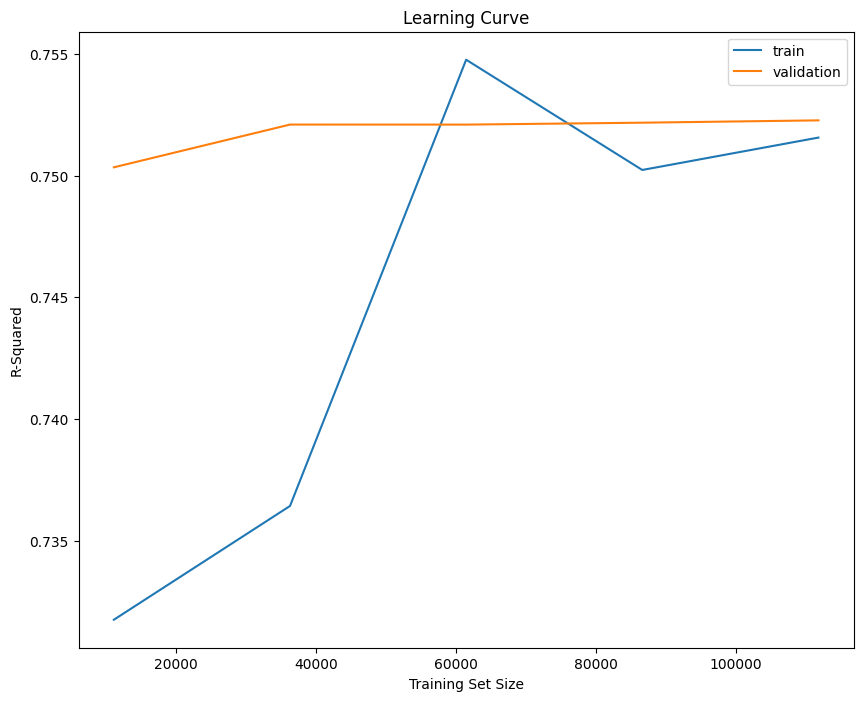

In [ ]:
learning_curve_plot(LinearRegression(), X_train, y_train)

[learning_curve] Training set sizes: [ 11175  36319  61463  86607 111752]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  25 | elapsed:    2.4s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done  17 out of  25 | elapsed:    5.1s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    7.5s finished


[0.99942572 0.99880734 0.99856696 0.99834467 0.99813826]
[0.77354364 0.82104273 0.87347287 0.87961317 0.8963888 ]


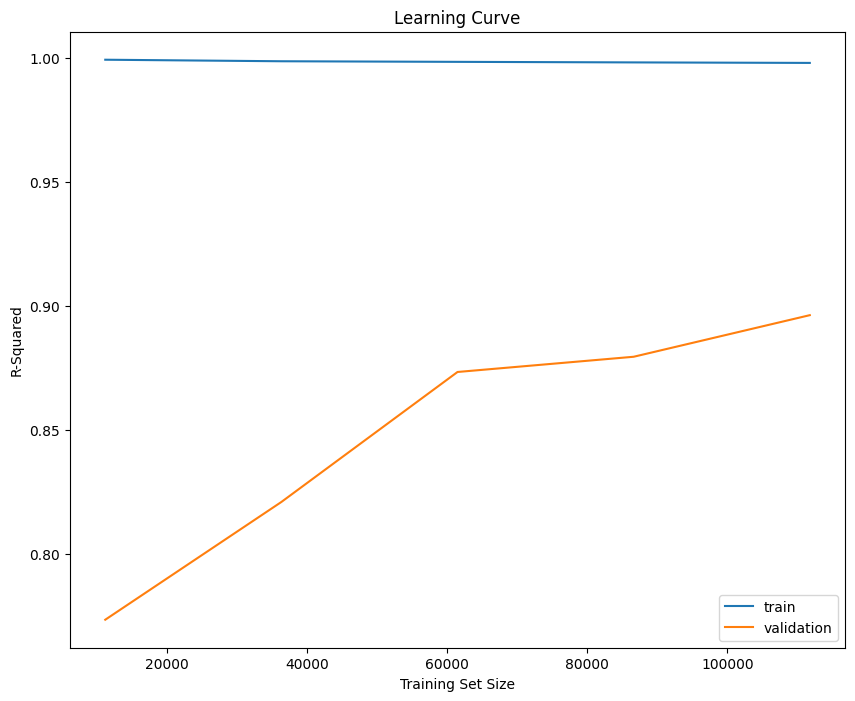

In [ ]:
learning_curve_plot(DecisionTreeRegressor(max_depth=100), X_train, y_train)

[learning_curve] Training set sizes: [ 11175  36319  61463  86607 111752]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  25 | elapsed:  5.0min remaining: 10.6min
[Parallel(n_jobs=-1)]: Done  17 out of  25 | elapsed: 10.1min remaining:  4.8min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 14.8min finished


[0.97638265 0.9835804  0.98735223 0.98641676 0.98726182]
[0.86765202 0.89323145 0.92056042 0.92445802 0.92840175]


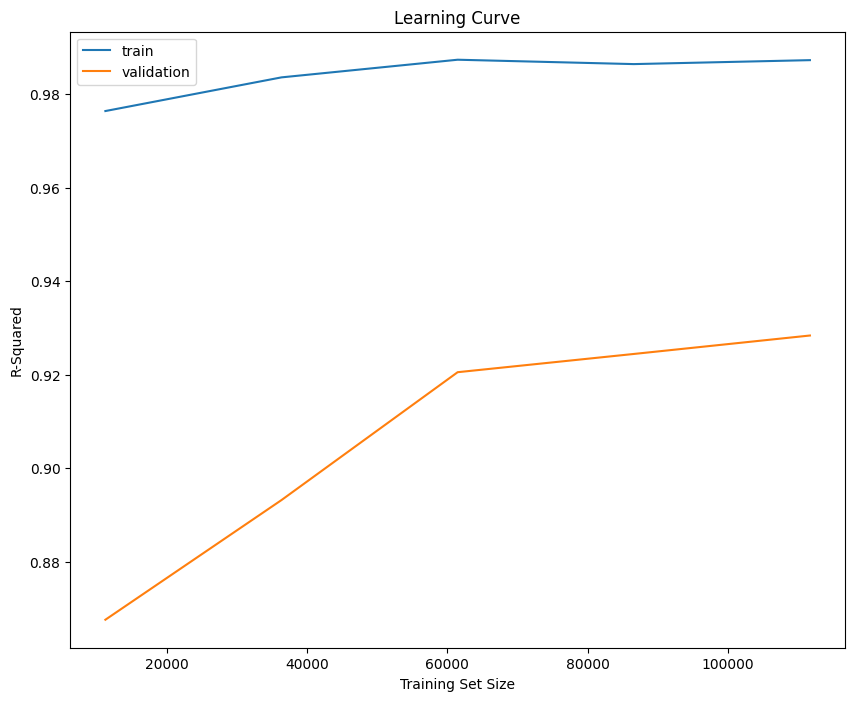

In [ ]:
learning_curve_plot(RandomForestRegressor(max_depth=25, n_estimators=50), X_train, y_train)

`LinearRegression` seems to reach a point of well-fitting, but overall has a low $R^2$ score. `DecisionTreeRegressor` and `RandomForestRegressor` seem to underfitting as performance improves as training set size increases but never reaches a point of well- or over-fitting. Thus we conclude that it will be necessary to use K-Fold Cross Validation, in order to make the most use of our data.

We now try 3x3 Cross Validation for our base models as well as a number of other regression models:
- k-Nearest Neighbors Regression
- AdaBoost Regression
- Gradient Boosting Regression
- Bagging Regression
- Multilayer Perceptron Regression
- Stochastic Gradient Descent Regression

Parameters were set so the modelling would run in a reasonable amount of time. 

In [ ]:
models = []

models.append(('LR', LinearRegression()))
models.append(('DTR', DecisionTreeRegressor(max_depth = 100)))
models.append(('RFR', RandomForestRegressor(max_depth = 25, n_estimators = 50, n_jobs=-1)))
models.append(('KNNR', KNeighborsRegressor(n_neighbors = 3, n_jobs=-1)))
models.append(('ABR', AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=10), n_estimators=50)))
models.append(('GBR', GradientBoostingRegressor(n_estimators=50)))
models.append(('BR', BaggingRegressor(n_estimators=50, n_jobs=-1)))
models.append(('NNR', MLPRegressor(learning_rate_init=0.1)))
models.append(('SGDR', SGDRegressor()))


r2_results = []
mse_results = []
names = []
rkfold = RepeatedKFold(n_splits=3, n_repeats=3, random_state=42)

for name, model in models:
    cv_results = cross_validate(model, X_train, y_train, cv=rkfold, scoring=('r2', "neg_mean_squared_error"), n_jobs = -1)
    r2_results.append(cv_results['test_r2'])
    mse_results.append(cv_results['test_neg_mean_squared_error'])
    names.append(name)
    print("%s \tR-Squared: %f (%f), \t Negative MSE: %f (%f)" % (name, cv_results['test_r2'].mean(), cv_results['test_r2'].std(), cv_results['test_neg_mean_squared_error'].mean(), cv_results['test_neg_mean_squared_error'].std()))

LR 	R-Squared: 0.751520 (0.022170), 	 Negative MSE: -189034083.938556 (22379934.764153)
DTR 	R-Squared: 0.879445 (0.013843), 	 Negative MSE: -91803297.780072 (13418147.284190)
RFR 	R-Squared: 0.920409 (0.017976), 	 Negative MSE: -60783192.472800 (15220521.284938)
KNNR 	R-Squared: 0.869746 (0.026481), 	 Negative MSE: -99491562.967231 (23019272.551929)
ABR 	R-Squared: 0.898263 (0.016418), 	 Negative MSE: -77498149.312298 (14243782.640648)
GBR 	R-Squared: 0.850194 (0.014847), 	 Negative MSE: -114061301.624217 (15088477.022752)
BR 	R-Squared: 0.919627 (0.017941), 	 Negative MSE: -61324403.255288 (14970601.989971)
NNR 	R-Squared: 0.855482 (0.026768), 	 Negative MSE: -110145723.323807 (22739397.592807)
SGDR 	R-Squared: 0.746300 (0.022329), 	 Negative MSE: -192881939.735160 (21538622.968144)


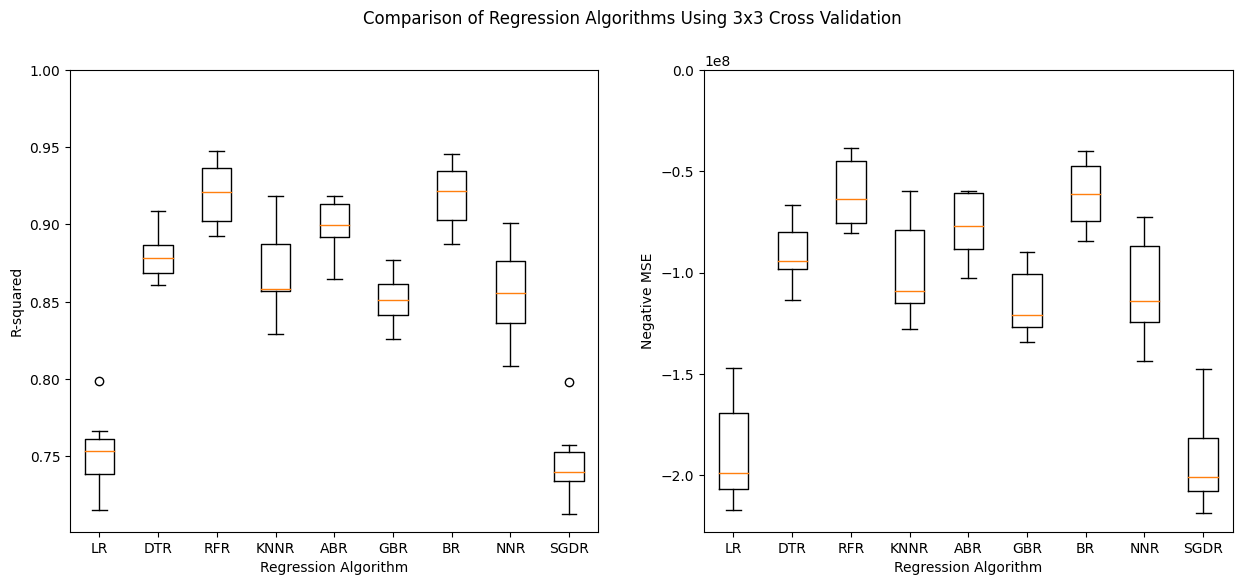

In [ ]:
fig = plt.figure(figsize=(15,6))
fig.suptitle('Comparison of Regression Algorithms Using 3x3 Cross Validation')
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.boxplot(r2_results)
ax2.boxplot(mse_results)
ax1.set_xticklabels(names)
ax1.set_xlabel("Regression Algorithm")
ax1.set_ylabel("R-squared")
ax2.set_xticklabels(names)
ax2.set_xlabel("Regression Algorithm")
ax2.set_ylabel("Negative MSE")
ax1.set_ylim(top=1)
ax2.set_ylim(top=0)
plt.show()

This results identify `RandomForestRegressor` and `BaggingRegressor` as our best options. Next we consider using a randomized hyperparameter search using `RandomziedSearchCV`, with 15 iterations and using Negative MSE for scoring, in order to find the optimal hyperparameters. First we perform the randomized hyperparameter search on `RandomForestRegressor`.

In [ ]:
params = {
    "n_estimators" : randint(10,200),
    "max_depth" : randint(10,200),
    "min_samples_split" : randint(1,50),
    "min_samples_leaf" : randint(1,50),
}

rfr_rs = RandomizedSearchCV(RandomForestRegressor(random_state=42, verbose=1), n_iter=10, param_distributions = params, n_jobs = -1, cv=3, scoring = "neg_mean_squared_error", verbose= 1)

In [ ]:
rfr_rs.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  53 out of  53 | elapsed:   39.4s finished


RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(random_state=42, verbose=1),
                   n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000022EA8077C40>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000022EA8077040>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000022EA80742B0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000022EA2E73F10>},
                   scoring='neg_mean_squared_error', verbose=1)

In [ ]:
print(rfr_rs.best_params_)
print(rfr_rs.best_score_)
best_rfr = rfr_rs.best_estimator_

{'max_depth': 121, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 53}
-60635848.99876674


In [ ]:
best_rfr.score(X_test, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  53 out of  53 | elapsed:    0.8s finished


0.9286339610761772

There was a slight improvement  the previous score for `RandomForestRegressor`. Now we perform the randomized hyperparameter search on `BaggingRegressor`.

In [ ]:
params={
        "n_estimators" : randint(10,100),
}

br_gc = RandomizedSearchCV(
    BaggingRegressor(n_jobs = -1, random_state = 42),
    param_distributions=params,
    n_iter=10,
    scoring='neg_mean_squared_error', 
    n_jobs = -1,
    cv=3,
    verbose=1)

In [ ]:
br_gc.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=BaggingRegressor(n_jobs=-1, random_state=42),
                   n_jobs=-1,
                   param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000232C6A2E7D0>},
                   scoring='neg_mean_squared_error', verbose=1)

In [ ]:
print(br_gc.best_params_)
print(br_gc.best_score_)
best_br = br_gc.best_estimator_

{'n_estimators': 75}
-57993641.06811938


In [ ]:
best_br.score(X_test, y_test)

0.9310382149595278

This is a good improvement over the previous score for `BaggingRegressor`. 
You can find the rest of the notebook here: https://github.com/COGS118A/Group002-Wi23/blob/main/report.ipynb

# Discussion

### Interpreting the result
---------------
Overall, we found that the two regressors that gave us the highest $R^2$ scores were BaggingRegressor and RandomForestRegressor. The BaggingRegressor returned a score of approximately 0.9196 and the RandomForestRegressor returned a score of about 0.9204 before some hyperparameter adjustments. Both of these scores were significantly higher than the model that performed third-best (AdaBoostRegressor, with an $R^2$ score of approximately 0.8983) before the same hyperparameter adjustments, indicating that they had the best performance on the testing set of cars.

We then took those two well-performing regressors and made some hyperparameter adjustments in our models involving them to maximize our resultant $R^2$ score. We performed a randomized hyperparameter search on both of the regressors. Fro the RandomForestRegressor, the optimal value for each of the hyperparameters were 121 for max_depth, 2 for min_samples_leaf, 3 for min_samples_split, and 53 for n_estimators, and our resultant $R^2$ score was 0.9286. For BaggingRegressor, the optimal value for our hyperparameter was 75 for n_estimators, and we achieved an $R^2$ score of 0.9310.

Given that our $R^2$ scores were high, we believe that our model is fairly accurate at predicting the market-value of used cars. The highest $R^2$ value we got, 0.9310 (for BaggingRegressor), indicates that the 93.1% of the variation in the market-value of a used car can be explained by our model using BaggingRegressor with its optimal hyperparameter value (75 for the n_estimators hyperparameter). 

Despite calculating the value of the Mean-Squared Error or the Mean Absolute Error for each of our regressors, we did not use them to evaluate our performance, as detailed below.

### Limitations

We seem to be running into a problem in which we are getting large negative MSE and MAE values for both the training dataset and testing dataset despite the high $R^2$ score. For example, the value of the MSE for BaggingRegressor was -61324403.26, which is rather large. Similar high values for the MSE and MAE are common across all the other models, too, suggesting that there might be an issue with the data itself. The data has been cleaned properly and has minimal outliers, so we are unsure where we might be going wrong. We also tried tuning the hyperparameters but that did not lead to much change. 

A limitation to the validity of our study is inflation of money over time - as time passes, inflation (in either direction) may occur, driving the prices of same-quality used cars up and down. A potential way to overcome this limitation is to only use the data of cars from one year and run the regressors on them, and do the same for car data from other years (analyze each year individually so the regressor doesn't get confused as market prices vary over time).

### Ethics & Privacy
----------------------------

One ethical concern is that of privacy. For example, if a car in the dataset has obvious collision or dent marks, then it could bring in a variable of the driving history of the seller, which could raise privacy concerns. Furthermore, the algorithm may also unintentionally raise or lower the prices of certain types of cars, which could have a slight effect on the vehicle industry economy overall. Lastly is the issue of transparency - if the audience of this algorithm does not fully understand how it works or arrives to a price, they may be inclined to not believe it and sell their car for whatever price they want to sell it for.

### Conclusion

-----------------

Overall, we were able to successfully create a model to predict the market prices of used cars based on a variety of factors. While creating this model, we tested several different classifiers and regressors, and found that the BaggingRegressor and the RandomForestRegressor performed the best at predicting car prices out of them all as they had the highest $R^2$ score out of the rest. This could fit into the context of other work in the field by showing others how much sellers are willing to sell used cars for given its location and condition, and can serve as a template for the sale of other used vehicles, like trucks and vans, based on their own condition and location. Some directions for future work are that we could conduct similar experiments for used cars in other countries to see how much their market value is. Alternatively, we could take this experiment and add some more features in addition to the ones we are using now, like the car's engine condition or the size of its trunk. We could also use the same methodology to conduct a similar experiment for other vehicles (as mentioned before) or even other items altogether.

# Footnotes
- MordorIntelligence. “US Used Car Market Research - Share, Size & Trend Analysis - Industry Report.” Mordor Intelligence, https://www.mordorintelligence.com/industry-reports/united-states-used-car-market. Accessed 21 February 2023.
- Clark, Karen. “thredUP Releases 10th Annual Resale Report with Insights on a Decade of Resale — thredUP newsroom.” thredUP newsroom, 17 May 2022, https://newsroom.thredup.com/news/thredup-releases-10th-annual-resale-report-with-insights-on-a-decade-of-resale. Accessed 21 February 2023.
- AlShared, Abdulla. “Used Cars Price Prediction and Valuation using Data Mining Techniques.” RIT Scholar Works, 12 2021, https://scholarworks.rit.edu/cgi/viewcontent.cgi?article=12220&context=theses. Accessed 21 February 2023.
- Bilen, Mehmet. (2021). Predicting Used Car Prices with Heuristic Algorithms and Creating a New Dataset. 6. 29-43.
- ACV Auctions. “Used Car Sales Data: Used Car Market Statistics: ACV Auctions.” ACV Auction, ACV Auctions, 24 June 2022, https://www.acvauctions.com/blog/used-car-sales-data.
- iSeeCars. “How Long Will It Take You to Sell Your Used Car?” CBS 42, CBS 42, 18 Sept. 2021, https://www.cbs42.com/news/business/how-long-will-it-take-you-to-sell-your-used-car/#:~:text=Analyzing%20over%20900%2C000%20new%20and,takes%2034.6%20days%20to%20sell.
- Yang, Richard R, et al. “AI Blue Book: Vehicle Price Prediction Using Visual Features.” 29 Mar. 2018, https://arxiv.org/pdf/1803.11227v2.pdf. Accessed 8 Mar. 2023.
- “Pgeocode.” PyPI, https://pypi.org/project/pgeocode/. 
- “Vininfo.” PyPI, https://pypi.org/project/vininfo/. 
- Bradley, Michael. “15 Best Luxury Car Brands: Ranking of the Top Premium Vehicles.” Luxe Digital, 11 Jan. 2023, https://luxe.digital/business/digital-luxury-ranking/best-luxury-car-brands/. 

